<a href="https://colab.research.google.com/github/WambuiMunene/Tensorflow-Notebooks/blob/main/TF2_0_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
# Additional Imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model


In [ ]:
# Load the data
cifar10 = tf.keras.datasets.cifar10

(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train,x_test = x_train/255.0, x_test/255.0
y_train,y_test = y_train.flatten(),y_test.flatten() # tf expects a one dimensional target
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [13]:
# show some misclassified examples
misclassified_idx = np.where(y_pred_classes!= y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32,32),cmap = 'gray')
plt.title ("True label:%s Predicted: %s" % (labels[y_test[i]],labels[y_pred_classes[i]])) ;


ValueError: cannot reshape array of size 3072 into shape (28,28)

In [ ]:
# Number of classes K

K = len(set(y_train))
print("Number of classes:",K)

Number of classes: 10


In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
# Build the modelusing the Keras functional api

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Fit and train the model

model.compile(optimizer='adam',
loss= 'sparse_categorical_crossentropy',
metrics = ['accuracy'])

r = model.fit (x_train, y_train, validation_data=(x_test, y_test), epochs = 15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3388 - loss: 1.7870 - val_accuracy: 0.5309 - val_loss: 1.2895
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.5170 - loss: 1.3330 - val_accuracy: 0.5833 - val_loss: 1.1578
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5737 - loss: 1.1808 - val_accuracy: 0.6097 - val_loss: 1.0912
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6129 - loss: 1.0782 - val_accuracy: 0.6358 - val_loss: 1.0269
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6413 - loss: 1.0016 - val_accuracy: 0.6824 - val_loss: 0.9225
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6745 - loss: 0.9269 - val_accuracy: 0.6755 - val_loss: 0.9325
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6854 - loss: 0.8953 - val_accuracy: 0.6845 - val_loss: 0.9099
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7005 - loss: 0.8369 

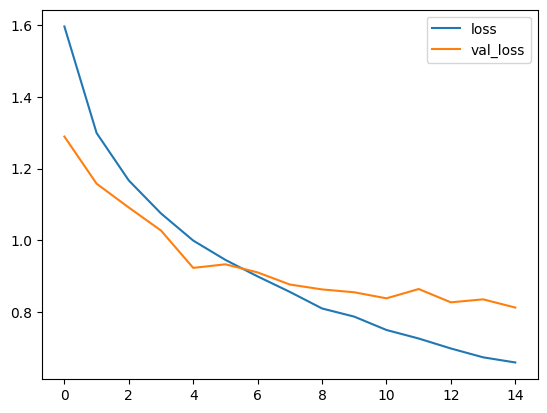

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend();

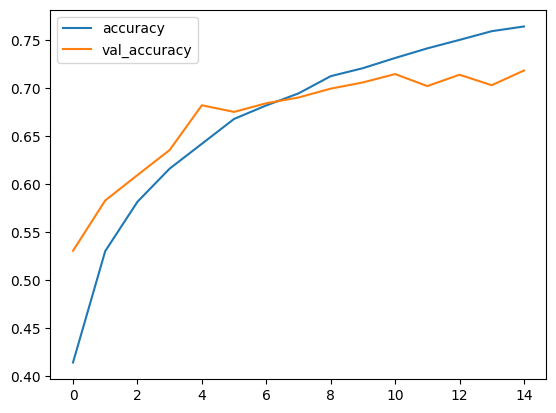

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.legend();

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


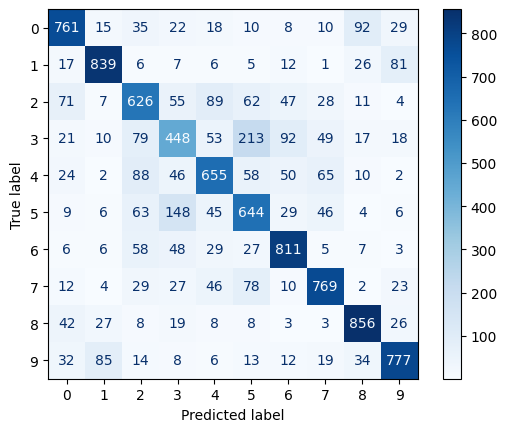

In [ ]:
# plot confusion matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# make predictions
y_pred = model.predict(x_test)
y_pred_classes =np.argmax(y_pred,axis=1)
y_true = y_test

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [14]:
labels = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Example: Convert the integer labels to their corresponding names
import numpy as np
y_true_names = [labels[i] for i in y_true]
y_pred_names = [labels[i] for i in y_pred_classes]

print("Example true labels:", y_true_names[:10])
print("Example predicted labels:", y_pred_names[:10])

Example true labels: ['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile']
Example predicted labels: ['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'cat', 'frog', 'cat', 'automobile']


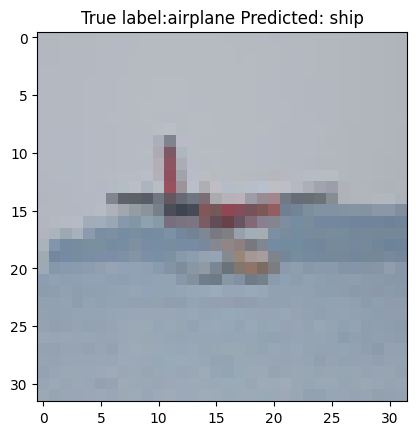

In [16]:
# show some misclassified examples
misclassified_idx = np.where(y_pred_classes!= y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32,32,3),cmap = 'gray')
plt.title ("True label:%s Predicted: %s" % (labels[y_test[i]],labels[y_pred_classes[i]])) ;
